<a href="https://colab.research.google.com/github/adilamin89/Churn/blob/main/Weather_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter city name: Milwaukee
Press Enter to use default dates (2025-05-20 to 2025-05-25)
Enter start date (YYYY-MM-DD) or press Enter for 2025-05-20: 
Enter end date (YYYY-MM-DD) or press Enter for 2025-05-25: 
Enter your OpenWeatherMap API key: 39fac3181ef0233068c1ff2c76b33507
Fetching weather data for Milwaukee...
Forecast saved to milwaukee_weather_forecast.png


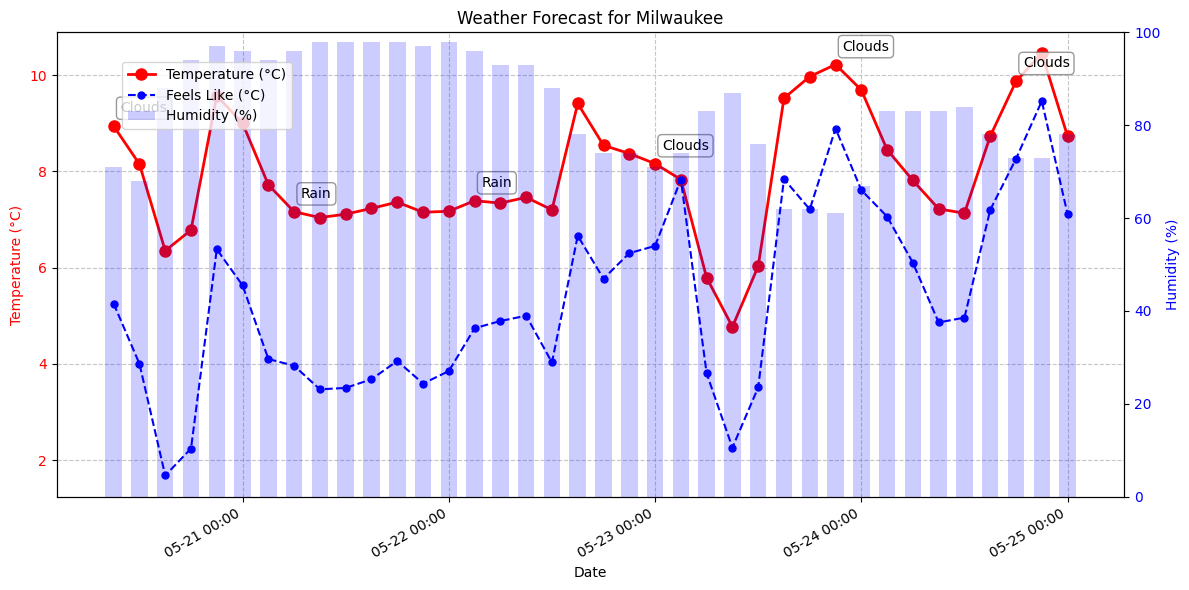

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

def get_simple_weather_forecast(city, api_key):
    """Get a simple weather forecast for a city"""
    # Get city coordinates
    geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}"
    geo_response = requests.get(geo_url).json()

    if not geo_response:
        print(f"City '{city}' not found")
        return None

    lat, lon = geo_response[0]['lat'], geo_response[0]['lon']

    # Get 5-day forecast (maximum available with free API)
    forecast_url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&units=metric&appid={api_key}"
    forecast_response = requests.get(forecast_url).json()

    # Parse forecast data
    forecast_list = []
    if 'list' in forecast_response:
        for forecast in forecast_response['list']:
            forecast_list.append({
                'date': datetime.fromtimestamp(forecast['dt']),
                'temp': forecast['main']['temp'],
                'feels_like': forecast['main']['feels_like'],
                'humidity': forecast['main']['humidity'],
                'weather': forecast['weather'][0]['main'],
                'description': forecast['weather'][0]['description']
            })

    # Create DataFrame
    df = pd.DataFrame(forecast_list)

    return df

def plot_simple_forecast(forecast_df, city, start_date=None, end_date=None):
    """Create a simple weather forecast plot"""
    # Filter by date range if provided
    if start_date and end_date:
        mask = (forecast_df['date'] >= start_date) & (forecast_df['date'] <= end_date)
        forecast_df = forecast_df.loc[mask]

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot temperature
    ax.plot(forecast_df['date'], forecast_df['temp'], 'ro-', linewidth=2, markersize=8, label='Temperature (°C)')

    # Plot feels like temperature
    ax.plot(forecast_df['date'], forecast_df['feels_like'], 'bo--', linewidth=1.5, markersize=5, label='Feels Like (°C)')

    # Add humidity as bars on a secondary y-axis
    ax2 = ax.twinx()
    ax2.bar(forecast_df['date'], forecast_df['humidity'], alpha=0.2, color='blue', width=0.08, label='Humidity (%)')
    ax2.set_ylabel('Humidity (%)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.set_ylim(0, 100)

    # Set x-axis format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    fig.autofmt_xdate()

    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature (°C)', color='red')
    ax.tick_params(axis='y', labelcolor='red')

    plt.title(f'Weather Forecast for {city}')

    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.7)
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

    # Adjust layout and add weather conditions as text annotations
    plt.tight_layout()

    # Add weather descriptions at a few key points
    for i in range(0, len(forecast_df), max(1, len(forecast_df) // 5)):
        ax.annotate(forecast_df.iloc[i]['weather'],
                   (forecast_df.iloc[i]['date'], forecast_df.iloc[i]['temp']),
                   xytext=(5, 10), textcoords='offset points',
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    return fig

def main():
    """Main function to run the simple weather forecast"""
    # Get user input
    city = input("Enter city name: ")

    # For simplicity, we'll use the current date as default
    today = datetime.now()
    default_start = today.strftime('%Y-%m-%d')
    default_end = (today + timedelta(days=5)).strftime('%Y-%m-%d')

    print(f"Press Enter to use default dates ({default_start} to {default_end})")
    start_date_str = input(f"Enter start date (YYYY-MM-DD) or press Enter for {default_start}: ")
    end_date_str = input(f"Enter end date (YYYY-MM-DD) or press Enter for {default_end}: ")

    # Use defaults if no input
    if not start_date_str:
        start_date_str = default_start
    if not end_date_str:
        end_date_str = default_end

    # Convert string dates to datetime
    try:
        start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
        end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
    except ValueError:
        print("Invalid date format. Please use YYYY-MM-DD format.")
        return

    # Your OpenWeatherMap API key
    api_key = input("Enter your OpenWeatherMap API key: ")

    # Get forecast data
    print(f"Fetching weather data for {city}...")
    forecast_df = get_simple_weather_forecast(city, api_key)

    if forecast_df is not None:
        # Plot forecast
        fig = plot_simple_forecast(forecast_df, city, start_date, end_date)

        # Save to file
        filename = f"{city.lower().replace(' ','_')}_weather_forecast.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Forecast saved to {filename}")

        # Show plot
        plt.show()

if __name__ == "__main__":
    main()

In [4]:
import requests
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta
from plotly.subplots import make_subplots

def get_simple_weather_forecast(city, api_key):
    """Get a simple weather forecast for a city"""
    # Get city coordinates
    geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}"
    geo_response = requests.get(geo_url).json()

    if not geo_response:
        print(f"City '{city}' not found")
        return None

    lat, lon = geo_response[0]['lat'], geo_response[0]['lon']

    # Get 5-day forecast (maximum available with free API)
    forecast_url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&units=metric&appid={api_key}"
    forecast_response = requests.get(forecast_url).json()

    # Parse forecast data
    forecast_list = []
    if 'list' in forecast_response:
        for forecast in forecast_response['list']:
            forecast_list.append({
                'date': datetime.fromtimestamp(forecast['dt']),
                'temp': forecast['main']['temp'],
                'feels_like': forecast['main']['feels_like'],
                'humidity': forecast['main']['humidity'],
                'wind_speed': forecast['wind']['speed'],
                'weather': forecast['weather'][0]['main'],
                'description': forecast['weather'][0]['description']
            })

    # Create DataFrame
    df = pd.DataFrame(forecast_list)

    return df

def create_interactive_plot(forecast_df, city, start_date=None, end_date=None):
    """Create a simple interactive Plotly plot"""
    # Filter by date range if provided
    if start_date and end_date:
        mask = (forecast_df['date'] >= start_date) & (forecast_df['date'] <= end_date)
        forecast_df = forecast_df.loc[mask]

    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add temperature trace
    fig.add_trace(
        go.Scatter(
            x=forecast_df['date'],
            y=forecast_df['temp'],
            name="Temperature (°C)",
            line=dict(color="#FF4500", width=3),
            mode="lines+markers",
            hovertemplate="<b>Date:</b> %{x}<br><b>Temperature:</b> %{y:.1f}°C"
        ),
        secondary_y=False
    )

    # Add feels-like temperature
    fig.add_trace(
        go.Scatter(
            x=forecast_df['date'],
            y=forecast_df['feels_like'],
            name="Feels Like (°C)",
            line=dict(color="#FF8C00", width=2, dash="dot"),
            mode="lines",
            hovertemplate="<b>Date:</b> %{x}<br><b>Feels Like:</b> %{y:.1f}°C"
        ),
        secondary_y=False
    )

    # Add humidity
    fig.add_trace(
        go.Bar(
            x=forecast_df['date'],
            y=forecast_df['humidity'],
            name="Humidity (%)",
            marker_color="rgba(0, 100, 255, 0.3)",
            hovertemplate="<b>Date:</b> %{x}<br><b>Humidity:</b> %{y}%"
        ),
        secondary_y=True
    )

    # Add wind speed as a line on secondary axis
    fig.add_trace(
        go.Scatter(
            x=forecast_df['date'],
            y=forecast_df['wind_speed'],
            name="Wind Speed (m/s)",
            line=dict(color="#1E90FF", width=2),
            mode="lines+markers",
            hovertemplate="<b>Date:</b> %{x}<br><b>Wind Speed:</b> %{y:.1f} m/s"
        ),
        secondary_y=True
    )

    # Add weather conditions as annotations
    for i in range(0, len(forecast_df), max(1, len(forecast_df) // 5)):
        fig.add_annotation(
            x=forecast_df.iloc[i]['date'],
            y=forecast_df.iloc[i]['temp'],
            text=forecast_df.iloc[i]['weather'],
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-40
        )

    # Update layout
    fig.update_layout(
        title=f"Weather Forecast for {city}",
        xaxis_title="Date",
        yaxis_title="Temperature (°C)",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        ),
        hovermode="x unified",
        height=600,
        width=900,
        plot_bgcolor='white',
        font=dict(size=12)
    )

    # Set y-axes titles
    fig.update_yaxes(title_text="Temperature (°C)", secondary_y=False, gridcolor='lightgray')
    fig.update_yaxes(title_text="Humidity (%) / Wind Speed (m/s)", secondary_y=True)

    # Set secondary y-axis range
    fig.update_yaxes(range=[0, 100], secondary_y=True)

    return fig

def main():
    """Main function to run the interactive weather forecast"""
    # Get user input
    city = input("Enter city name: ")

    # For simplicity, we'll use the current date as default
    today = datetime.now()
    default_start = today.strftime('%Y-%m-%d')
    default_end = (today + timedelta(days=5)).strftime('%Y-%m-%d')

    print(f"Press Enter to use default dates ({default_start} to {default_end})")
    start_date_str = input(f"Enter start date (YYYY-MM-DD) or press Enter for {default_start}: ")
    end_date_str = input(f"Enter end date (YYYY-MM-DD) or press Enter for {default_end}: ")

    # Use defaults if no input
    if not start_date_str:
        start_date_str = default_start
    if not end_date_str:
        end_date_str = default_end

    # Convert string dates to datetime
    try:
        start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
        end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
    except ValueError:
        print("Invalid date format. Please use YYYY-MM-DD format.")
        return

    # Your OpenWeatherMap API key
    api_key = input("Enter your OpenWeatherMap API key: ")

    # Get forecast data
    print(f"Fetching weather data for {city}...")
    forecast_df = get_simple_weather_forecast(city, api_key)

    if forecast_df is not None:
        # Create interactive plot
        fig = create_interactive_plot(forecast_df, city, start_date, end_date)

        # Save to HTML file
        html_file = f"{city.lower().replace(' ','_')}_weather_forecast.html"
        fig.write_html(html_file)
        print(f"Interactive forecast saved to {html_file}")

        # Show plot in browser
        fig.show()

if __name__ == "__main__":
    main()

Enter city name: Milwaukee
Press Enter to use default dates (2025-05-20 to 2025-05-25)
Enter start date (YYYY-MM-DD) or press Enter for 2025-05-20: 
Enter end date (YYYY-MM-DD) or press Enter for 2025-05-25: 
Enter your OpenWeatherMap API key: 39fac3181ef0233068c1ff2c76b33507
Fetching weather data for Milwaukee...
Interactive forecast saved to milwaukee_weather_forecast.html
